In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.2
nruns = 10
ouput_name = 'XGBRegressor_california_rate02'  

X, y = shap.datasets.california() #(n_points=1000)

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.55it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.86it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.94it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.80it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.95it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.99it/s]


Validation result: best alpha 0.01, best score 0.7372096149841181, scores {0.0: 0.7390770238887806, 0.01: 0.7372096149841181, 0.1: 0.7435591380256311, 1.0: 0.8303225480671403, 10.0: 0.9646211175927715, 100.0: 0.9965490122599373}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.84it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.02it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.01it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.05it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.86it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.98it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.03it/s]


Validation result: best alpha 0.01, best score 0.7372096149841181, scores {0.0: 0.7390770238887806, 0.01: 0.7372096149841181, 0.1: 0.7435591380256311, 1.0: 0.8303225480671405, 10.0: 0.9646211175927715, 100.0: 0.9965490122599372}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.69it/s]


loss 0.11501436939828275
loss 0.012109790537865464
loss 0.009268607632373544
number of runs used by missForest: 3
loss: 0.009268607632373544
loss 0.110663963398409
loss 0.01120516458434409
loss 0.009005673634968977
number of runs used by missForest: 3
loss: 0.009005673634968977



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 551.35it/s]


iteration: 1


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.32it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.65it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.66it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.49it/s]


Validation result: best alpha 0.0, best score 0.7849422861999905, scores {0.0: 0.7849422861999905, 0.01: 0.7854433911198441, 0.1: 0.7944257970417631, 1.0: 0.8587879387022246, 10.0: 0.9602778862843442, 100.0: 0.985015484410554}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 22.85it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.64it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.65it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.62it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.68it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.64it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.62it/s]


Validation result: best alpha 0.0, best score 0.7849422861999905, scores {0.0: 0.7849422861999905, 0.01: 0.7854433911198442, 0.1: 0.7944257970417631, 1.0: 0.8587879387022245, 10.0: 0.9602778862843442, 100.0: 0.985015484410554}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.05it/s]


loss 0.1095482107592908
loss 0.018277182362092206
loss 0.01305887807949282
loss 0.011971113883788896
loss 0.013161089902334215
loss 0.017012916857059537
loss 0.01991702879942456
loss 0.022956658204975795
loss 0.027589066679600798
loss 0.03231700431554117
number of runs used by missForest: 10
loss: 0.03231700431554117
loss 0.11168757602476109
loss 0.01661737635504515
loss 0.014338946558632026
loss 0.013922533646170425
loss 0.016281758324805974
loss 0.019119820887080346
loss 0.02301077958601957
loss 0.027850923589010833
loss 0.034320290419624214
loss 0.04127490894319534
number of runs used by missForest: 10
loss: 0.04127490894319534


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 553.38it/s]


iteration: 2


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.35it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.47it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.97it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.56it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.50it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.52it/s]


Validation result: best alpha 0.01, best score 0.6855102905619671, scores {0.0: 0.6867899614454841, 0.01: 0.6855102905619671, 0.1: 0.694785701409039, 1.0: 0.7913608575547733, 10.0: 0.9386814096793643, 100.0: 0.9733021332722381}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 22.98it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.54it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.62it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.25it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.57it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.20it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.32it/s]


Validation result: best alpha 0.01, best score 0.6855102905619671, scores {0.0: 0.6867899614454841, 0.01: 0.6855102905619671, 0.1: 0.694785701409039, 1.0: 0.7913608575547733, 10.0: 0.9386814096793644, 100.0: 0.9733021332722382}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.14it/s]


loss 0.11301454875475382
loss 0.014348622381386969
loss 0.011239371497412743
loss 0.011780866618225588
loss 0.014339554448568215
loss 0.016923495774843846
loss 0.019710271221520123
loss 0.023574055787037366
loss 0.029823733363069323
loss 0.03470471434129857
number of runs used by missForest: 10
loss: 0.03470471434129857
loss 0.11436535114081976
loss 0.014545573995716323
loss 0.010717221713244575
loss 0.010484934415832908
loss 0.012117216589096709
loss 0.015170238979267354
loss 0.017517712454243304
loss 0.022166952488581873
loss 0.02785502220723488
loss 0.034518629868954126
number of runs used by missForest: 10
loss: 0.034518629868954126


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 559.58it/s]


iteration: 3


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.46it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.71it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.72it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.68it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.74it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.71it/s]


Validation result: best alpha 0.1, best score 0.7756544186046318, scores {0.0: 0.7867363809158503, 0.01: 0.7791199772567676, 0.1: 0.7756544186046318, 1.0: 0.8573091058115379, 10.0: 0.9878911704360352, 100.0: 1.0190390105207356}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.32it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.67it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.71it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.72it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.62it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.68it/s]


Validation result: best alpha 0.1, best score 0.7756544186046318, scores {0.0: 0.7867363809158504, 0.01: 0.7791199772567678, 0.1: 0.7756544186046318, 1.0: 0.8573091058115379, 10.0: 0.9878911704360352, 100.0: 1.0190390105207354}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.02it/s]


loss 0.11553777176654134
loss 0.02395904356557372
loss 0.026687881745748748
loss 0.04123838965457597
loss 0.02937321113700201
loss 0.027017993605574237
loss 0.03806291671943222
loss 0.05339890314561106
loss 0.05775895159590143
loss 0.05968355386083641
number of runs used by missForest: 10
loss: 0.05968355386083641
loss 0.10136374649093663
loss 0.01630839379840079
loss 0.01826304084470623
loss 0.016862472747730527
loss 0.0169915598237925
loss 0.024206357108069874
loss 0.022164211932824897
loss 0.06787301467800827
loss 0.07500418112513092
loss 0.04338235164735109
number of runs used by missForest: 10
loss: 0.04338235164735109


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 568.05it/s]


iteration: 4


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.32it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.49it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.50it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.50it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.45it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.58it/s]


Validation result: best alpha 0.0, best score 0.7033734551878695, scores {0.0: 0.7033734551878695, 0.01: 0.7041957791991413, 0.1: 0.7153731786593306, 1.0: 0.7994588715322676, 10.0: 0.9296729498928232, 100.0: 0.960630455683569}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.25it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.45it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.67it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.53it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.58it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Validation result: best alpha 0.0, best score 0.7033734551878695, scores {0.0: 0.7033734551878695, 0.01: 0.7041957791991413, 0.1: 0.7153731786593306, 1.0: 0.7994588715322676, 10.0: 0.9296729498928232, 100.0: 0.9606304556835689}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 62.49it/s]


loss 0.13057714349362876
loss 0.012735032721804962
loss 0.010158887343836725
loss 0.01066592232274777
loss 0.017809569936433543
loss 0.019218712573052025
loss 0.020064414703011648
loss 0.02200549264739686
loss 0.026383437137013657
loss 0.0383120280674176
number of runs used by missForest: 10
loss: 0.0383120280674176
loss 0.12427403081257489
loss 0.016098024389170646
loss 0.013406450679214801
loss 0.016711749659053234
loss 0.01904952623093774
loss 0.02011183253932339
loss 0.022925750250546672
loss 0.026838421494155825
loss 0.03049268612922637
loss 0.036486119784095675
number of runs used by missForest: 10
loss: 0.036486119784095675


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 543.51it/s]


iteration: 5


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.42it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.62it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.65it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.43it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Validation result: best alpha 0.01, best score 0.7635497445455025, scores {0.0: 0.7655624735574098, 0.01: 0.7635497445455025, 0.1: 0.7700588696112065, 1.0: 0.8534884234697958, 10.0: 0.9886441689000097, 100.0: 1.0210788928987338}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.13it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.99it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.79it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.78it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.63it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.76it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Validation result: best alpha 0.01, best score 0.7635497445455025, scores {0.0: 0.7655624735574098, 0.01: 0.7635497445455025, 0.1: 0.7700588696112065, 1.0: 0.8534884234697957, 10.0: 0.9886441689000097, 100.0: 1.021078892898734}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.20it/s]


loss 0.0995213392055189
loss 0.01163119555985817
loss 0.009449199469272964
number of runs used by missForest: 3
loss: 0.009449199469272964
loss 0.10776898349426499
loss 0.016519085980818454
loss 0.012772948029580492
loss 0.011911409169989898
loss 0.013593862807937866
loss 0.014454215183011331
loss 0.018201946068712813
loss 0.021700724366078457
loss 0.026198791747122883
loss 0.03136171291785943
number of runs used by missForest: 10
loss: 0.03136171291785943


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 545.39it/s]


iteration: 6


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.45it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.46it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.80it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Validation result: best alpha 0.01, best score 0.7708045410901085, scores {0.0: 0.7785967655877745, 0.01: 0.7708045410901085, 0.1: 0.7748359661936393, 1.0: 0.8591929627254281, 10.0: 0.9927245428949854, 100.0: 1.0244848732011163}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.26it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.80it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.75it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.80it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.84it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.79it/s]


Validation result: best alpha 0.01, best score 0.7708045410901085, scores {0.0: 0.7785967655877745, 0.01: 0.7708045410901085, 0.1: 0.7748359661936393, 1.0: 0.8591929627254283, 10.0: 0.9927245428949854, 100.0: 1.0244848732011163}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.48it/s]


loss 0.10718558839822089
loss 0.013247020081428952
loss 0.012038556347992224
loss 0.011534924118570027
loss 0.013973389265783157
loss 0.01679631348581626
loss 0.019457201854779047
loss 0.02551023332781372
loss 0.030579001734273893
loss 0.03860219032914648
number of runs used by missForest: 10
loss: 0.03860219032914648
loss 0.11053076106610557
loss 0.013702980969923173
loss 0.011576926612658472
loss 0.012068254273646327
loss 0.013141947515840066
loss 0.01614569990885913
loss 0.02063505048943335
loss 0.026313568472652392
loss 0.03403762149459796
loss 0.042806027826091594
number of runs used by missForest: 10
loss: 0.042806027826091594


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 518.89it/s]


iteration: 7


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.42it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.65it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.51it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.44it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.58it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Validation result: best alpha 0.01, best score 0.7687036573719781, scores {0.0: 0.772955833266652, 0.01: 0.7687036573719781, 0.1: 0.7724730770799747, 1.0: 0.8549027637998436, 10.0: 0.9860647445255847, 100.0: 1.017216627144631}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.25it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.59it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.44it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.64it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.62it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.61it/s]


Validation result: best alpha 0.01, best score 0.7687036573719782, scores {0.0: 0.772955833266652, 0.01: 0.7687036573719782, 0.1: 0.7724730770799746, 1.0: 0.8549027637998438, 10.0: 0.9860647445255846, 100.0: 1.0172166271446308}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.76it/s]


loss 0.1364834448367342
loss 0.034843508801514544
loss 0.021434968606972738
loss 0.011373716748654164
loss 0.013124880012703774
loss 0.020158418457116602
loss 0.02295730219951302
loss 0.02458902128258191
loss 0.03707909822769797
loss 0.041445402765837566
number of runs used by missForest: 10
loss: 0.041445402765837566
loss 0.12187169553488844
loss 0.02324849126667036
loss 0.062018124735397945
loss 0.06451869292385973
loss 0.06598874929849396
loss 0.07039765621253607
loss 0.07858561802836803
loss 0.08643461548424877
loss 0.07767348126104032
loss 0.06841807293227455
number of runs used by missForest: 10
loss: 0.06841807293227455


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 543.99it/s]


iteration: 8


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.08it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.08it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.26it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.40it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.48it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.43it/s]


Validation result: best alpha 0.01, best score 0.7486169499133183, scores {0.0: 0.7487369005605414, 0.01: 0.7486169499133183, 0.1: 0.7580177298998764, 1.0: 0.8378215987553556, 10.0: 0.960675067422153, 100.0: 0.9899743667424363}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 22.72it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.30it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.45it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.43it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.43it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.24it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.10it/s]


Validation result: best alpha 0.01, best score 0.7486169499133183, scores {0.0: 0.7487369005605414, 0.01: 0.7486169499133183, 0.1: 0.7580177298998764, 1.0: 0.8378215987553558, 10.0: 0.9606750674221533, 100.0: 0.9899743667424364}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 56.90it/s]


loss 0.10845817542189964
loss 0.014210399545928247
loss 0.01183280689535042
loss 0.013474036638609776
loss 0.015641542853875465
loss 0.017417056445662812
loss 0.020752932211757363
loss 0.02459898039796524
loss 0.031109348235855646
loss 0.0389213440838332
number of runs used by missForest: 10
loss: 0.0389213440838332
loss 0.11248684571994234
loss 0.014756958049864927
loss 0.014667807097587542
loss 0.01658489721012345
loss 0.014763344928176039
loss 0.01722175019864362
loss 0.02349543796920132
loss 0.028924221507945765
loss 0.03179791398002719
loss 0.036551038499082776
number of runs used by missForest: 10
loss: 0.036551038499082776


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 515.44it/s]


iteration: 9


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.98it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.10it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.23it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.41it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.26it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Validation result: best alpha 0.01, best score 0.7718822037796497, scores {0.0: 0.772004204193036, 0.01: 0.7718822037796497, 0.1: 0.7808554697160102, 1.0: 0.8555890769336367, 10.0: 0.972234204088174, 100.0: 1.0002673366739083}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.28it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.25it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.08it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.12it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.42it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.26it/s]


Validation result: best alpha 0.01, best score 0.7718822037796497, scores {0.0: 0.7720042041930357, 0.01: 0.7718822037796497, 0.1: 0.7808554697160103, 1.0: 0.8555890769336366, 10.0: 0.972234204088174, 100.0: 1.0002673366739083}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.00it/s]


loss 0.11849991630933294
loss 0.013225013577185318
loss 0.010277638050792943
loss 0.011966229493453235
loss 0.013525433532347388
loss 0.016291702646732614
loss 0.018299765055615758
loss 0.02192874300828827
loss 0.026198320378199334
loss 0.030128784706057114
number of runs used by missForest: 10
loss: 0.030128784706057114
loss 0.12864214576125035
loss 0.017614636601289754
loss 0.012150307144270418
loss 0.011052135918229003
loss 0.013675666467438348
loss 0.016211030540853065
loss 0.02128585518217136
loss 0.022434748381664118
loss 0.026969745967907202
loss 0.03948338033034006
number of runs used by missForest: 10
loss: 0.03948338033034006


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 516.01it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [8]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [9]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
Latitude & 0.203 & 0.276 & 0.075 & 0.125 & 0.150 & 0.133 & 0.116 & 0.059 \\
Longitude & 0.194 & 0.276 & 0.075 & 0.121 & 0.146 & 0.128 & 0.107 & 0.067 \\
MedInc & 0.144 & 0.330 & 0.128 & 0.152 & 0.148 & 0.142 & 0.139 & 0.117 \\
AveOccup & 0.061 & 0.070 & 0.061 & 0.053 & 0.055 & 0.060 & 0.061 & 0.058 \\
AveRooms & 0.023 & 0.054 & 0.040 & 0.019 & 0.020 & 0.028 & 0.035 & 0.037 \\
HouseAge & 0.018 & 0.034 & 0.022 & 0.025 & 0.024 & 0.022 & 0.024 & 0.021 \\
AveBedrms & 0.013 & 0.067 & 0.009 & 0.017 & 0.015 & 0.014 & 0.012 & 0.007 \\
Population & 0.005 & 0.007 & 0.004 & 0.008 & 0.009 & 0.008 & 0.006 & 0.004 \\
\bottomrule
\end{tabular}



In [10]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.328 0.234 0.182 0.174 0.193 8.716]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.354 0.175 0.077 0.054 0.061 0.096 0.217]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.223 0.254 0.239 0.239 0.174 0.263 0.317]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[1.736 0.   ]
 [1.715 0.   ]
 [1.722 0.   ]
 [1.722 0.   ]
 [1.768 0.   ]
 [1.71  0.   ]
 [1.667 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[1.277 1.19  1.148 1.306 1.354 1.398 1.381 1.357]
 [1.697 1.327 1.386 0.748 1.038 1.612 1.554 1.262]
 [1.753 1.37  0.795 1.391 1.35  1.518 1.773 1.791]
 [1.756 1.378 0.804 1.375 1.358 1.512 1.794 1.812]
 [1.779

In [12]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE','GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,1.277319
Mean Imputation,0.327774,1.696698
MICE,0.233686,1.753440
DIMV,0.181529,1.755824
missForest,0.173719,1.779211
SOFT-IMPUTE,0.193371,1.731251
GAIN,8.716205,1.563690


imputation MSE versus Spearman statistic


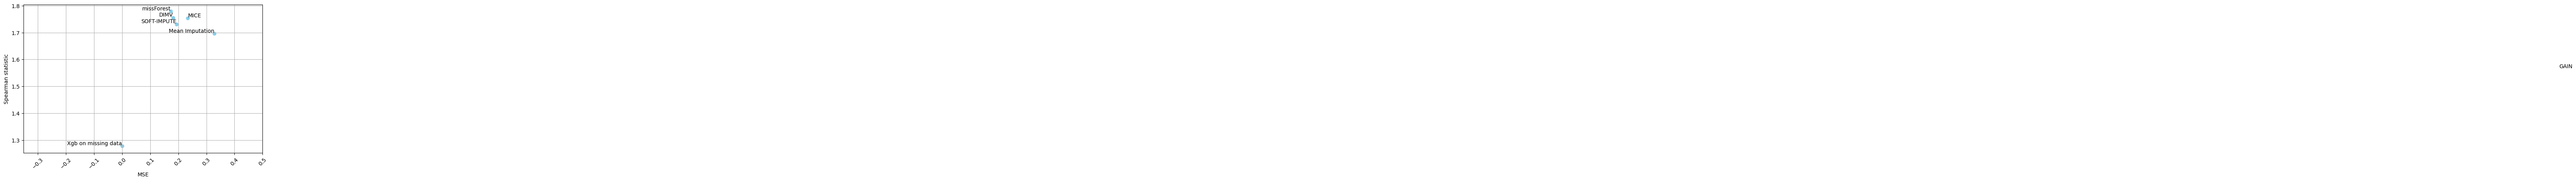

In [13]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if row.name == 'MICE':
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.35, 0.5)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [14]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.222664,0.354087
Mean Imputation,0.254187,0.175322
MICE,0.238767,0.077420
DIMV,0.239471,0.053940
missForest,0.173874,0.060575
SOFT-IMPUTE,0.263454,0.096353
GAIN,0.316767,0.217176


imputation MSE versus Shapley MSE


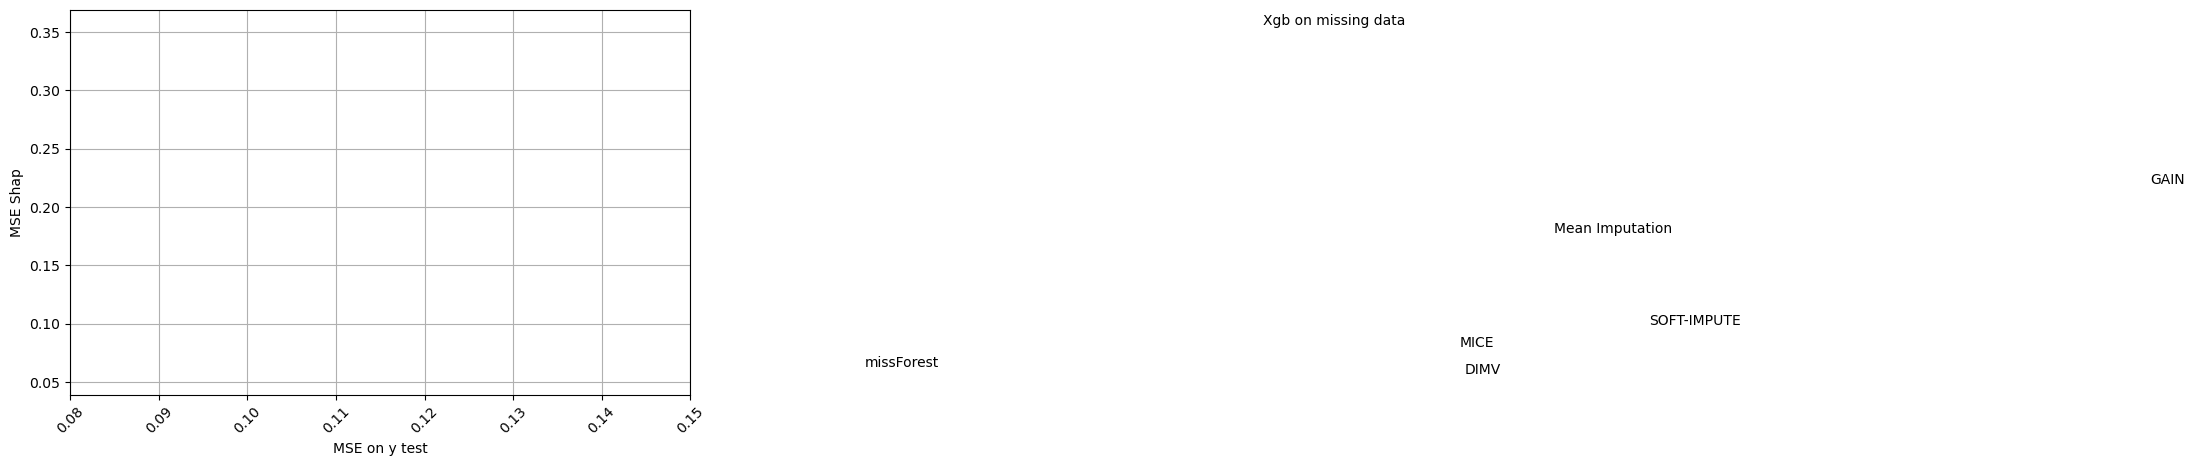

In [15]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.08, 0.15)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [16]:
# MSE on X test
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.354087
Mean Imputation,0.327774,0.175322
MICE,0.233686,0.077420
DIMV,0.181529,0.053940
missForest,0.173719,0.060575
SOFT-IMPUTE,0.193371,0.096353
GAIN,8.716205,0.217176


imputation MSE versus Shapley MSE


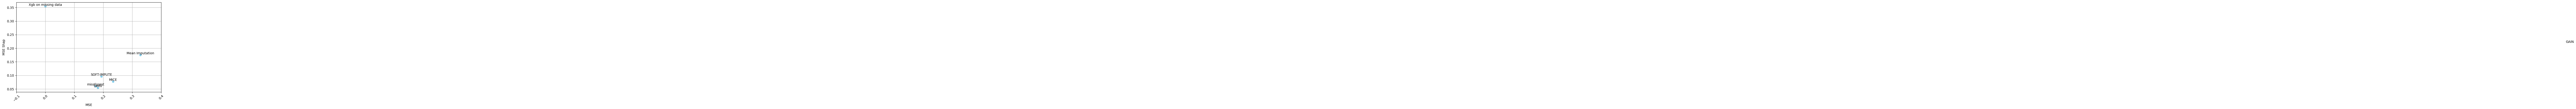

In [17]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

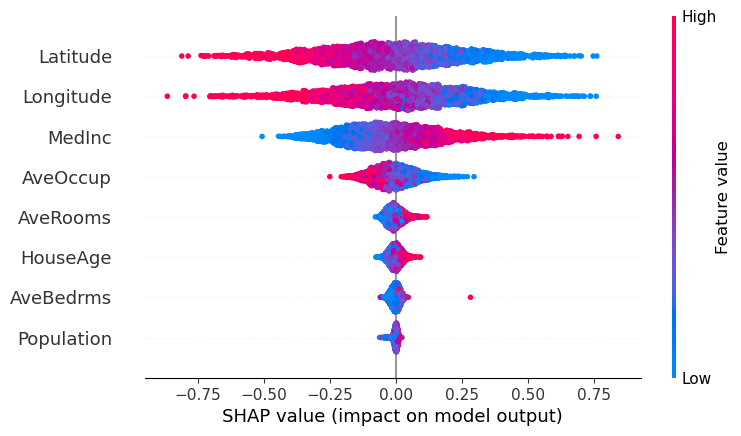

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

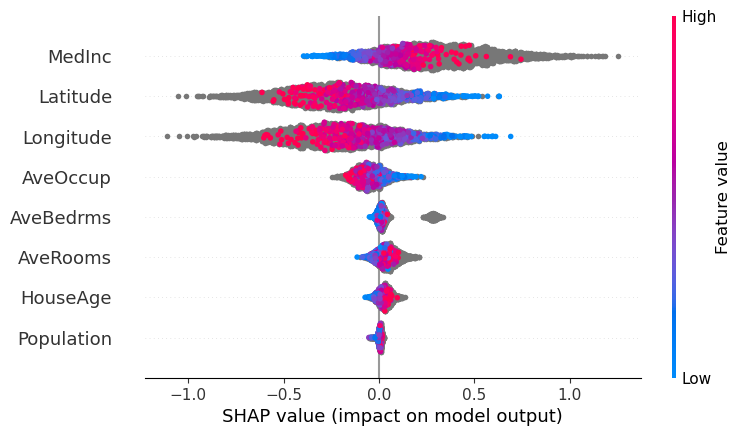

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

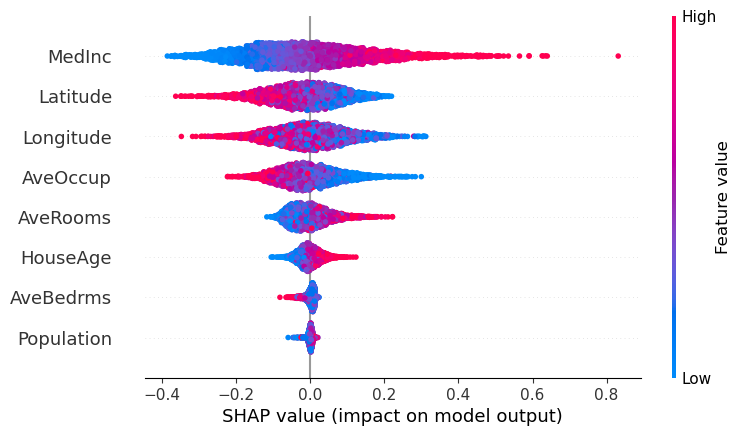

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

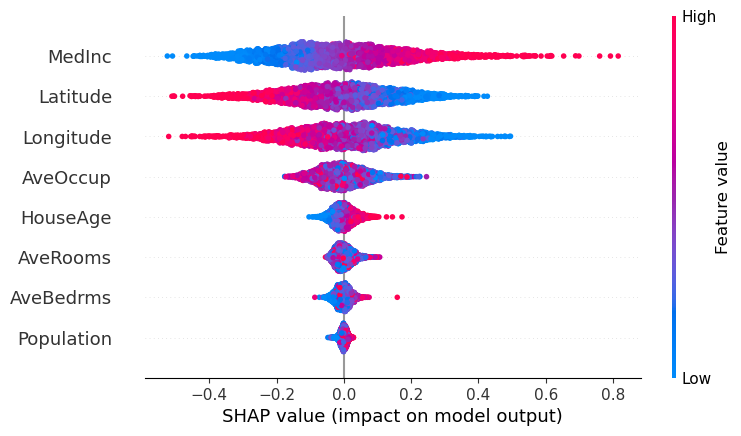

In [21]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

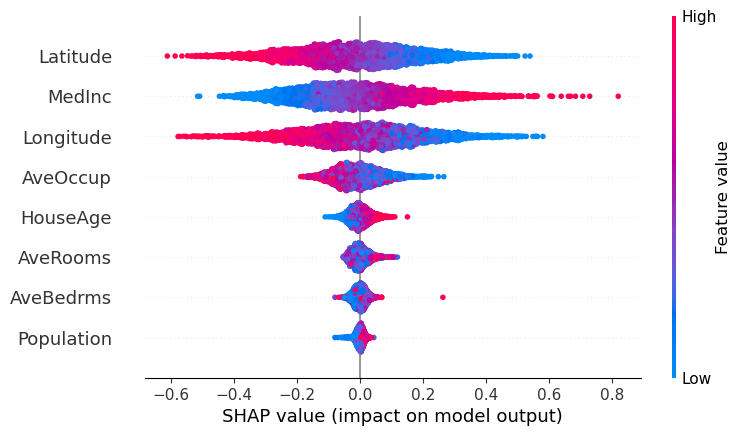

In [22]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

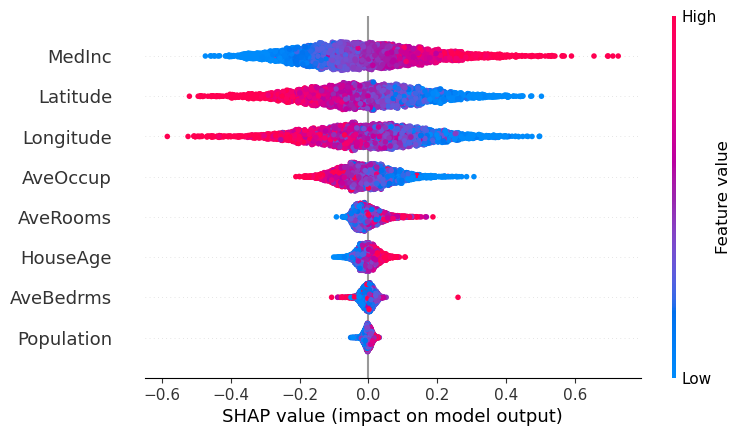

In [23]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

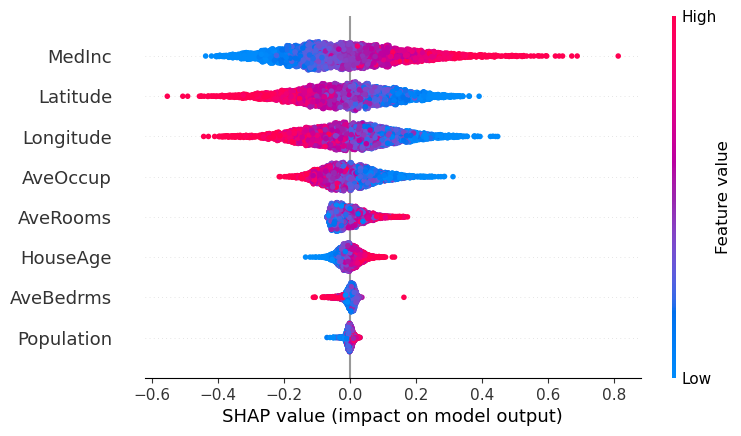

In [24]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

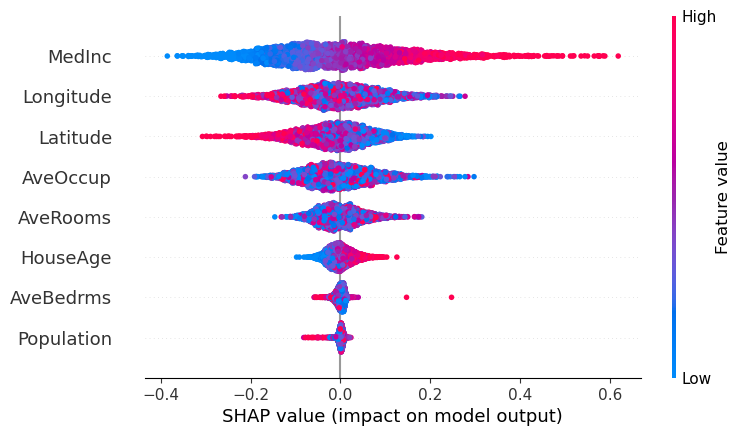

In [25]:
plt.figure()
shap.plots.beeswarm(shap_values_gain, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

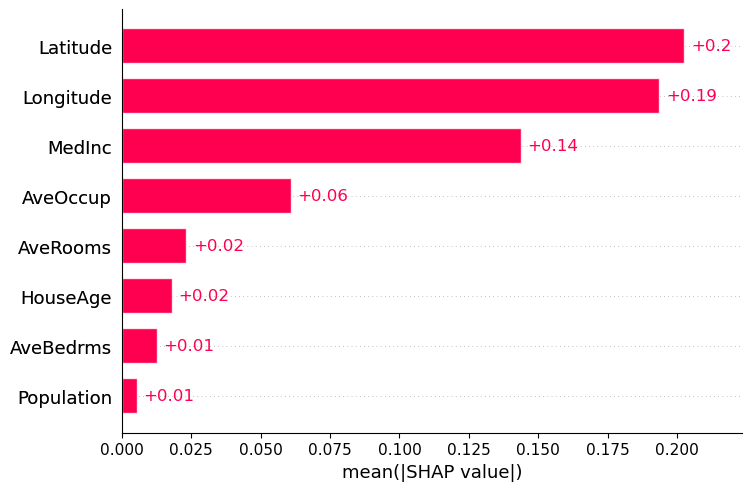

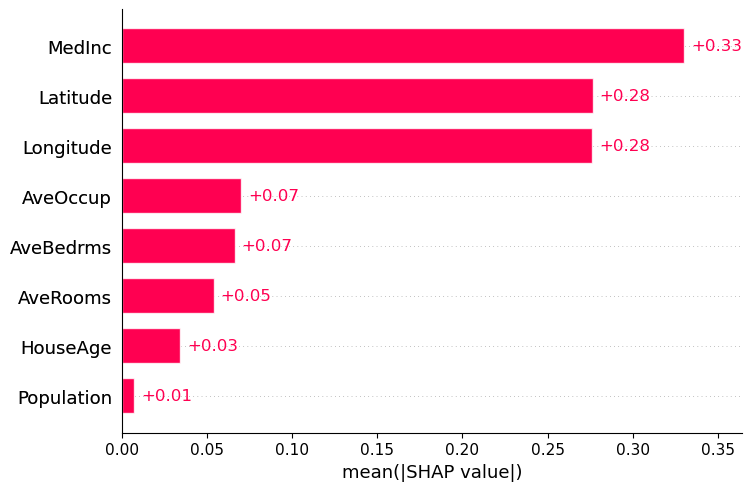

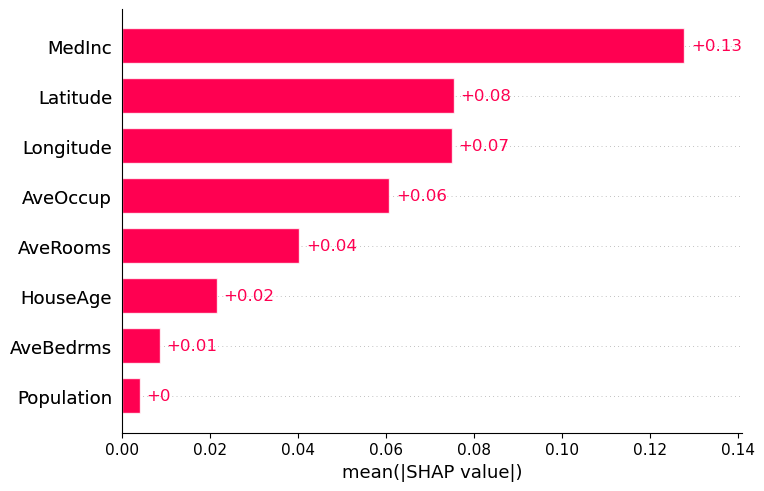

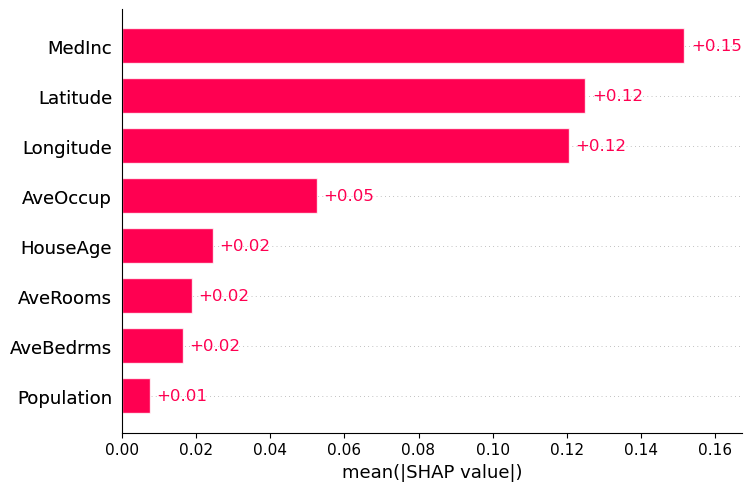

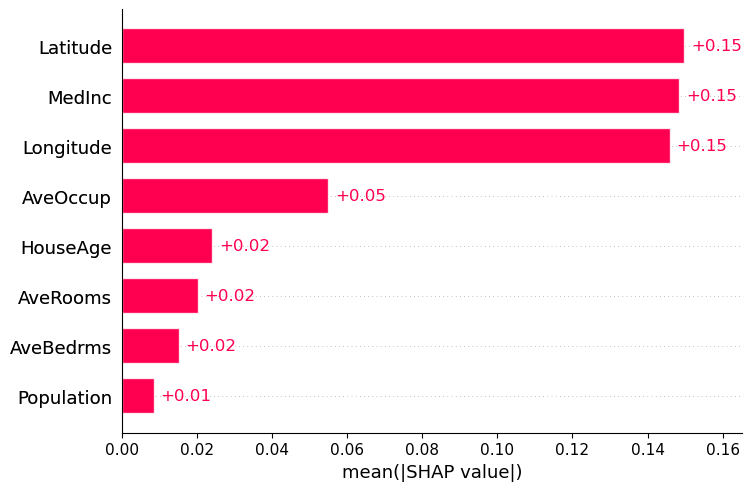

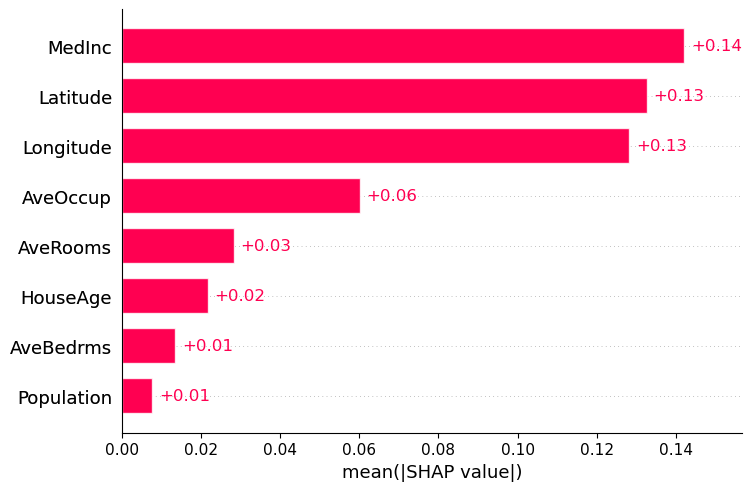

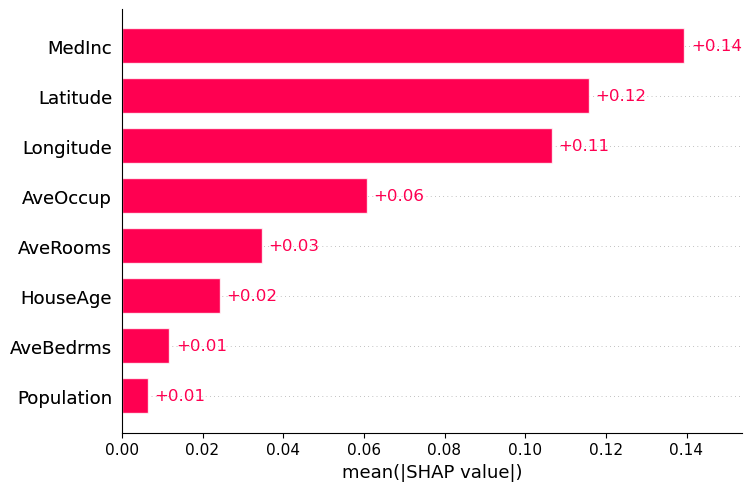

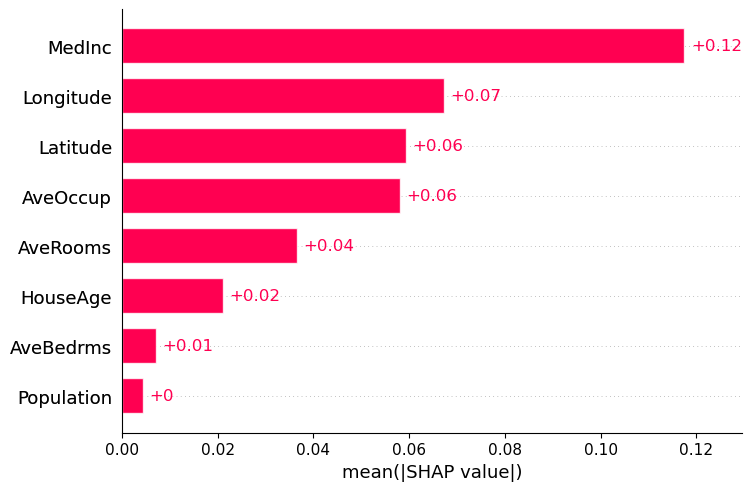

In [26]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')

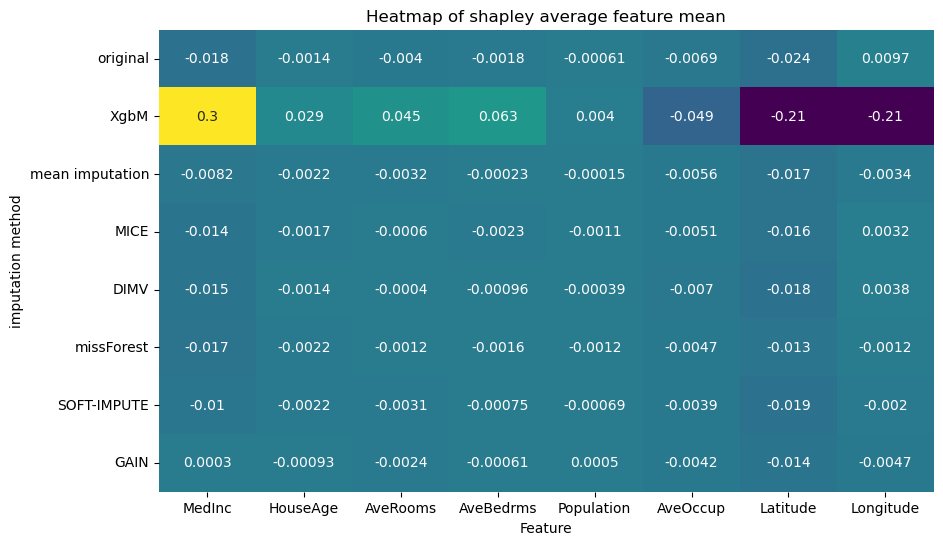

In [28]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
column_mean_gain = np.mean(shap_values_gain.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft, column_mean_gain)))
heat_df.columns = X.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE', 'GAIN'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()